# REDE NEURAL RECORRENTE

In [1]:
# Importando as bibliotecas necessárias:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Carregando o banco

In [2]:
ovi = pd.read_csv('ovi_clima.csv', sep=',')

In [3]:
# Retirando variáveis que não serão usadas
df = ovi.drop(columns=['SemEpi','data', 'temp','temp_min'])
df.head()

,Status,precip,temp_max,umid
0,0,0.0,24.263,58.583
1,0,0.0,24.263,58.583
2,0,0.0,24.263,58.583
3,0,0.0,24.263,58.583
4,1,0.0,24.263,58.583


# Divisão de teste e treino

In [4]:
X = df.drop(['Status'], axis=1)
X.head()

,precip,temp_max,umid
0,0.0,24.263,58.583
1,0.0,24.263,58.583
2,0.0,24.263,58.583
3,0.0,24.263,58.583
4,0.0,24.263,58.583


In [5]:
y = df.Status
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Status, dtype: int64

In [6]:
# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [7]:
# Verificando as formas dos dados:
X_train.shape,X_test.shape

((24367, 3), (10443, 3))

In [8]:
y_train.shape,y_test.shape

((24367,), (10443,))

# Criando modelo

In [9]:
modelo = MLPClassifier(hidden_layer_sizes= (50, 100, 50), alpha=0.05)

modelo.fit(X_train, y_train.values.ravel())

MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 100, 50))

In [10]:
# Treinando o modelo
y_pred = modelo.predict(X_test)

In [11]:
# Matriz de Confusão
pd.crosstab(y_test, y_pred)

col_0,0,1
Status,,
0,4888,1687
1,1726,2142


In [12]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      6575
           1       0.56      0.55      0.56      3868

    accuracy                           0.67     10443
   macro avg       0.65      0.65      0.65     10443
weighted avg       0.67      0.67      0.67     10443



In [13]:
# Acurácia
acuracia = accuracy_score(y_test, y_pred)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.6732 de acurácia.


In [14]:
# Predizendo as probabilidades
yhat = modelo.predict_proba(X)

In [15]:
yhat = yhat[:, 1] # manter somente para a classe positiva

In [16]:
# Criando a função para plotar a curva ROC
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='Curva ROC (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva Característica de Operação do Receptor (ROC)')
    plt.legend()
    plt.show()

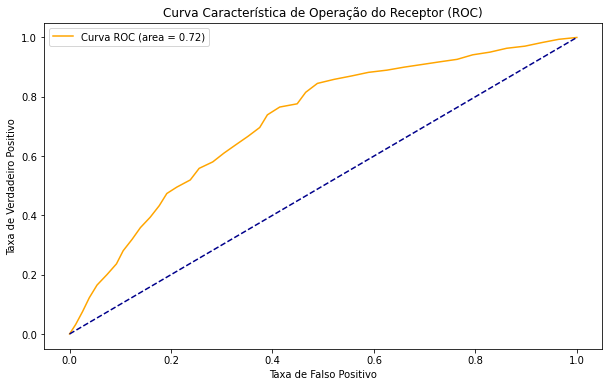

In [17]:
# Plotando a Curva ROC
plot_roc_curve(y, yhat)